In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Kaggle Install Dataset Download

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/gdrive/MyDrive/AUST_CSE_4_2/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download hassan06/nslkdd

 79% 11.0M/13.9M [00:00<00:00, 111MB/s]
100% 13.9M/13.9M [00:00<00:00, 117MB/s]


In [ ]:
!unzip nslkdd.zip

Archive:  nslkdd.zip
  inflating: KDDTest+.arff           
  inflating: KDDTest+.txt            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest1.jpg            
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  
  inflating: KDDTrain1.jpg           
  inflating: index.html              
  inflating: nsl-kdd/KDDTest+.arff   
  inflating: nsl-kdd/KDDTest+.txt    
  inflating: nsl-kdd/KDDTest-21.arff  
  inflating: nsl-kdd/KDDTest-21.txt  
  inflating: nsl-kdd/KDDTest1.jpg    
  inflating: nsl-kdd/KDDTrain+.arff  
  inflating: nsl-kdd/KDDTrain+.txt   
  inflating: nsl-kdd/KDDTrain+_20Percent.arff  
  inflating: nsl-kdd/KDDTrain+_20Percent.txt  
  inflating: nsl-kdd/KDDTrain1.jpg   
  inflating: nsl-kdd/index.html      


# Imports

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Dataset Load

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
train_df = pd.read_csv('/content/KDDTrain+.txt',header = None, names = col_names)
test_df = pd.read_csv('/content/KDDTest+.txt',header = None, names = col_names)

In [ ]:
train20 = pd.read_csv('/content/KDDTrain+_20Percent.txt',header = None, names = col_names)
test21 = pd.read_csv('/content/KDDTest-21.txt',header = None, names = col_names)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(125973, 43)
(22544, 43)


In [ ]:
print(train20.shape)
print(test21.shape)

(25192, 43)
(11850, 43)


In [ ]:
df = pd.concat([train_df,test_df])

In [ ]:
df.shape

(148517, 43)

In [ ]:
diff = len(df) - len(df.drop_duplicates())
diff

610

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(147907, 43)

In [ ]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,http,SF,208,2393,0,0,0,0,...,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.0,normal,21
1,0,tcp,ftp_data,SF,40494,0,0,0,0,0,...,0.32,0.02,0.32,0.00,0.00,0.00,0.03,0.0,normal,18
2,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.54,0.01,0.01,0.00,0.99,0.98,0.00,0.0,neptune,18
3,0,icmp,ecr_i,SF,1480,0,0,1,0,0,...,0.01,0.08,0.01,0.00,0.61,0.00,0.01,0.0,pod,20
4,0,tcp,http,SF,255,379,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.51,1.00,0.00,0.00,0.00,1.00,1.0,portsweep,21
6,0,tcp,http,SF,304,904,0,0,0,0,...,1.00,0.00,0.04,0.03,0.00,0.00,0.00,0.0,normal,21
7,4353,udp,other,SF,147,105,0,0,0,0,...,0.00,0.73,0.99,0.00,0.00,0.00,0.00,0.0,normal,21
8,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.07,0.00,0.00,1.00,1.00,0.00,0.0,neptune,19
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.0,neptune,21


In [ ]:
df_train,df_test = np.split(df,[int(.8*len(df))])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(118325, 43)
(29582, 43)


In [ ]:
df_train = pd.concat([df_train,train20])

In [ ]:
df_test = pd.concat([df_test,test21])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(143517, 43)
(41432, 43)


In [ ]:
df_train = df_train.drop_duplicates()

In [ ]:
df_test = df_test.drop_duplicates()

In [ ]:
print(df_train.shape)
df_train

(123406, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,http,SF,208,2393,0,0,0,0,...,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.0,normal,21
1,0,tcp,ftp_data,SF,40494,0,0,0,0,0,...,0.32,0.02,0.32,0.00,0.00,0.00,0.03,0.0,normal,18
2,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.54,0.01,0.01,0.00,0.99,0.98,0.00,0.0,neptune,18
3,0,icmp,ecr_i,SF,1480,0,0,1,0,0,...,0.01,0.08,0.01,0.00,0.61,0.00,0.01,0.0,pod,20
4,0,tcp,http,SF,255,379,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25171,0,tcp,private,S0,0,0,0,0,0,0,...,0.11,0.07,0.00,0.00,1.00,1.00,0.00,0.0,neptune,19
25173,0,udp,domain_u,SF,39,99,0,0,0,0,...,1.00,0.00,1.00,0.01,0.00,0.00,0.00,0.0,normal,21
25179,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.09,0.00,0.00,1.00,1.00,0.00,0.0,neptune,21
25184,29,tcp,ftp,SF,329,1063,0,0,0,6,...,0.24,0.02,0.00,0.00,0.00,0.00,0.03,0.1,normal,20


In [ ]:
print(df_test.shape)
df_test

(39076, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
118325,0,tcp,http,S0,0,0,0,0,0,0,...,0.26,0.02,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
118326,0,udp,private,SF,1,0,0,0,0,0,...,0.61,0.05,1.00,0.00,0.00,0.00,0.00,0.00,satan,18
118327,0,tcp,ldap,S0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
118328,1,tcp,private,RSTOS0,0,0,0,0,0,0,...,0.01,0.31,0.77,0.00,0.50,0.50,0.27,0.50,portsweep,20
118329,0,udp,domain_u,SF,44,130,0,0,0,0,...,0.95,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,5,tcp,pop_3,SF,28,93,0,0,0,0,...,1.00,0.00,0.04,0.08,0.00,0.00,0.00,0.00,guess_passwd,6
11845,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18
11847,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13
11848,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15


# Dataset Informations

In [ ]:
rows_train, cols_train  = df_train.shape
rows_test, cols_test  = df_test.shape
print(f"The train dataset is composed of {rows_train} rows and {cols_train} columns")
print(f"The test dataset is composed of {rows_test} rows and {cols_test} columns")

The train dataset is composed of 123406 rows and 43 columns
The test dataset is composed of 39076 rows and 43 columns


In [ ]:
df_train.drop(['difficulty_level'],axis=1,inplace=True)
df_test.drop(['difficulty_level'],axis=1,inplace=True)
df_test.shape

(39076, 42)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123406 entries, 0 to 25185
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     123406 non-null  int64  
 1   protocol_type                123406 non-null  object 
 2   service                      123406 non-null  object 
 3   flag                         123406 non-null  object 
 4   src_bytes                    123406 non-null  int64  
 5   dst_bytes                    123406 non-null  int64  
 6   land                         123406 non-null  int64  
 7   wrong_fragment               123406 non-null  int64  
 8   urgent                       123406 non-null  int64  
 9   hot                          123406 non-null  int64  
 10  num_failed_logins            123406 non-null  int64  
 11  logged_in                    123406 non-null  int64  
 12  num_compromised              123406 non-null  int64  
 13  

In [ ]:
df_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,123406.000000,1.234060e+05,1.234060e+05,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,...,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000,123406.000000
mean,280.879430,4.489240e+04,2.006149e+04,0.000170,0.020266,0.000219,0.193102,0.004319,0.404097,0.282207,...,183.902922,119.196960,0.533100,0.084148,0.144169,0.030181,0.257583,0.252888,0.135127,0.135467
std,2485.649778,5.901511e+06,4.062828e+06,0.013044,0.239665,0.020328,2.043735,0.072503,0.490718,24.176803,...,98.455385,111.161822,0.448025,0.193844,0.306470,0.106797,0.429427,0.430691,0.321685,0.334343
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,71.000000,0.590000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.780000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.680000,0.620000,0.000000,0.000000
max,54451.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(df_train['label'].value_counts())

39

In [ ]:
df_train['label'].value_counts()

normal             64312
neptune            38188
satan               3639
ipsweep             3082
portsweep           2614
smurf               2553
nmap                1309
back                1101
guess_passwd        1048
mscan                799
warezclient          759
warezmaster          752
teardrop             749
apache2              587
processtable         540
snmpguess            271
saint                259
mailbomb             229
pod                  172
snmpgetattack        136
httptunnel           109
buffer_overflow       43
rootkit               20
multihop              19
land                  16
sendmail              13
named                 13
xterm                 11
ftp_write             11
imap                  10
ps                    10
loadmodule             9
xlock                  6
phf                    5
perl                   4
xsnoop                 3
sqlattack              2
spy                    2
udpstorm               1
Name: label, dtype: int64

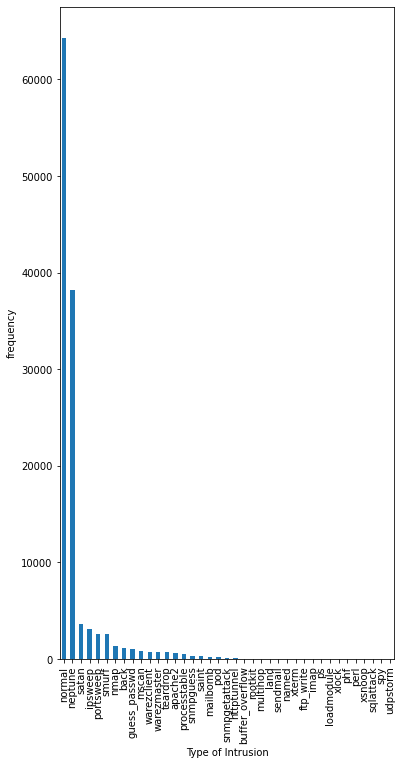

In [ ]:
fig,ax = plt.subplots()
fig.set_figheight(12)

df_train['label'].value_counts().plot(ax=ax, kind = 'bar', xlabel = 'Type of Intrusion', ylabel = 'frequency')

plt.show()

In [ ]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(df_train)
change_label(df_test)

In [ ]:
df_train.label.value_counts()

normal    64312
Dos       44136
Probe     11702
R2L        3157
U2R          99
Name: label, dtype: int64

In [ ]:
df_test.label.value_counts()

normal    17130
Dos       14161
Probe      4640
R2L        3071
U2R          74
Name: label, dtype: int64

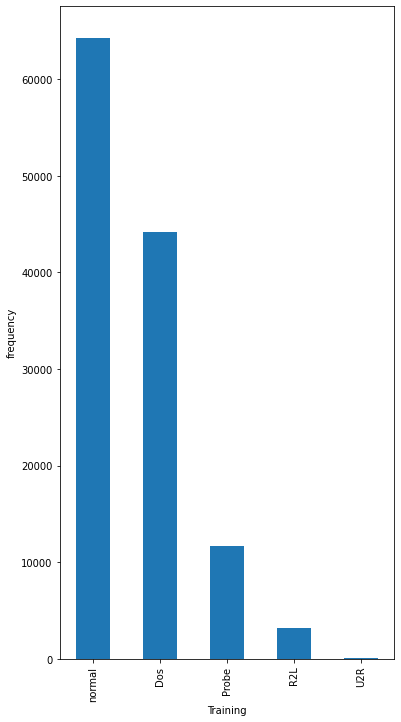

In [ ]:
fig,ax = plt.subplots()
fig.set_figheight(12)

df_train.label.value_counts().plot(ax=ax,kind = 'bar', xlabel = 'Training', ylabel = 'frequency')

plt.show()

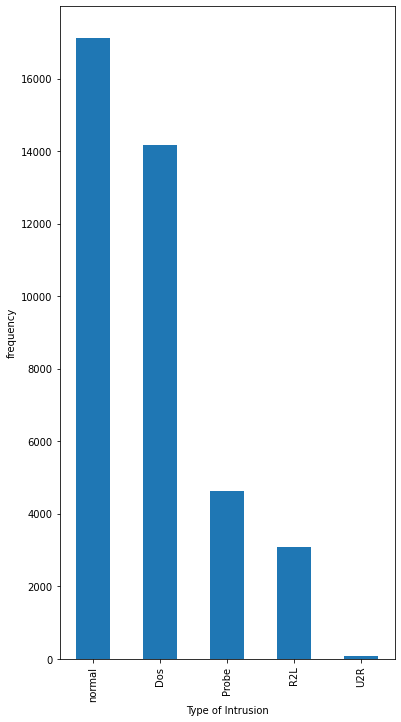

In [ ]:
fig,ax = plt.subplots()
fig.set_figheight(12)

df_test['label'].value_counts().plot(ax=ax, kind = 'bar', xlabel = 'Type of Intrusion', ylabel = 'frequency')
plt.show()

In [ ]:
df_train['label'].unique()

array(['normal', 'Dos', 'Probe', 'R2L', 'U2R'], dtype=object)

In [ ]:
df_train.label.value_counts()

normal    64312
Dos       44136
Probe     11702
R2L        3157
U2R          99
Name: label, dtype: int64

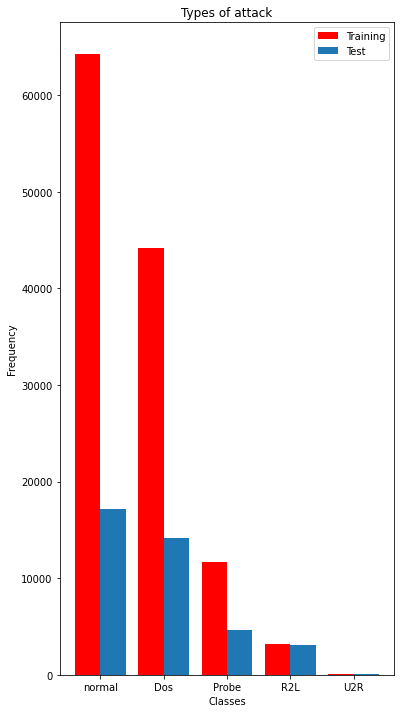

In [ ]:
fig,ax = plt.subplots()
fig.set_figheight(12)
labels = ['normal','Dos','Probe','R2L','U2R']

X_axis = np.arange(len(labels))

plt.bar(X_axis - 0.2, df_train.label.value_counts(),0.4,label = 'Training', color='r' )
plt.bar(X_axis + 0.2, df_test.label.value_counts(), 0.4, label = 'Test')
plt.xticks(X_axis, labels)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Types of attack")
plt.legend()
plt.show()

# Feature Selection

In [ ]:
X_train = df_train.drop(['label'], axis = 1)
Y_train = df_train['label']
X_test = df_test.drop(['label'], axis = 1)
Y_test = df_test['label']
print(Y_train)
X_train

0         Probe
1           Dos
2        normal
3        normal
4           Dos
          ...  
25179       Dos
25184    normal
25188       R2L
25189       Dos
25191       Dos
Name: label, Length: 123423, dtype: object


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,232,1,0.00,0.05,0.02,0.00,0.00,0.0,0.03,1.0
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,141,47,0.33,0.05,0.33,0.00,0.01,0.0,0.45,0.0
2,0,tcp,http,SF,340,1240,0,0,0,0,...,157,255,1.00,0.00,0.01,0.02,0.00,0.0,0.00,0.0
3,0,udp,private,SF,105,147,0,0,0,0,...,163,119,0.73,0.02,0.01,0.00,0.00,0.0,0.00,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,255,17,0.07,0.08,0.00,0.00,0.00,0.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25179,0,tcp,private,S0,0,0,0,0,0,0,...,255,13,0.05,0.09,0.00,0.00,1.00,1.0,0.00,0.0
25184,29,tcp,ftp,SF,329,1063,0,0,0,6,...,255,60,0.24,0.02,0.00,0.00,0.00,0.0,0.03,0.1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.0,0.00,0.0
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.0,1.00,1.0


In [ ]:
print(df_train['protocol_type'].unique())
print(df_train['service'].unique())
print(df_train['flag'].unique())

['tcp' 'icmp' 'udp']
['private' 'ecr_i' 'http' 'domain_u' 'eco_i' 'iso_tsap' 'pop_3' 'nntp'
 'auth' 'whois' 'nnsp' 'bgp' 'time' 'name' 'Z39_50' 'gopher' 'smtp'
 'telnet' 'urp_i' 'ftp' 'ftp_data' 'http_443' 'mtp' 'kshell' 'uucp'
 'klogin' 'ctf' 'courier' 'supdup' 'daytime' 'finger' 'hostnames' 'link'
 'X11' 'ntp_u' 'echo' 'vmnet' 'other' 'netstat' 'domain' 'uucp_path'
 'login' 'netbios_dgm' 'ldap' 'sunrpc' 'IRC' 'netbios_ssn' 'imap4' 'exec'
 'netbios_ns' 'efs' 'csnet_ns' 'systat' 'ssh' 'discard' 'shell' 'tftp_u'
 'sql_net' 'remote_job' 'rje' 'pop_2' 'tim_i' 'printer' 'urh_i' 'red_i'
 'pm_dump' 'http_2784' 'aol' 'harvest' 'http_8001']
['REJ' 'SF' 'S0' 'RSTR' 'RSTO' 'S1' 'S2' 'SH' 'OTH' 'S3' 'RSTOS0']


In [ ]:
str_col = ['protocol_type','service','flag']
for i in str_col:
    X_train[i] = LabelEncoder().fit_transform(X_train[i])
    X_test[i] = LabelEncoder().fit_transform(X_test[i])
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,49,1,0,0,0,0,0,0,...,232,1,0.00,0.05,0.02,0.00,0.00,0.0,0.03,1.0
1,0,0,15,9,1032,0,0,0,0,0,...,141,47,0.33,0.05,0.33,0.00,0.01,0.0,0.45,0.0
2,0,1,24,9,340,1240,0,0,0,0,...,157,255,1.00,0.00,0.01,0.02,0.00,0.0,0.00,0.0
3,0,2,49,9,105,147,0,0,0,0,...,163,119,0.73,0.02,0.01,0.00,0.00,0.0,0.00,0.0
4,0,1,49,1,0,0,0,0,0,0,...,255,17,0.07,0.08,0.00,0.00,0.00,0.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25179,0,1,49,5,0,0,0,0,0,0,...,255,13,0.05,0.09,0.00,0.00,1.00,1.0,0.00,0.0
25184,29,1,19,9,329,1063,0,0,0,6,...,255,60,0.24,0.02,0.00,0.00,0.00,0.0,0.03,0.1
25188,0,1,20,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.0,0.00,0.0
25189,0,1,49,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.0,1.00,1.0


In [ ]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
118325,0,0,13,9,8,0,0,0,0,0,...,2,140,1.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00
118326,0,2,41,9,1,0,0,0,0,0,...,255,1,0.00,0.21,1.00,0.00,0.00,0.00,0.00,0.00
118327,0,1,22,9,240,6514,0,0,0,0,...,198,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
118328,0,1,46,5,0,0,0,0,0,0,...,255,20,0.08,0.07,0.00,0.00,1.00,1.00,0.00,0.00
118329,0,1,57,5,0,0,0,0,0,0,...,62,85,0.35,0.05,0.02,0.02,1.00,0.26,0.00,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,5,1,44,9,28,93,0,0,0,0,...,24,25,1.00,0.00,0.04,0.08,0.00,0.00,0.00,0.00
11845,0,2,11,9,43,43,0,0,0,0,...,255,255,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
11846,0,1,22,9,336,285,0,0,0,0,...,255,234,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00
11848,0,1,54,1,0,0,0,0,0,0,...,171,52,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00


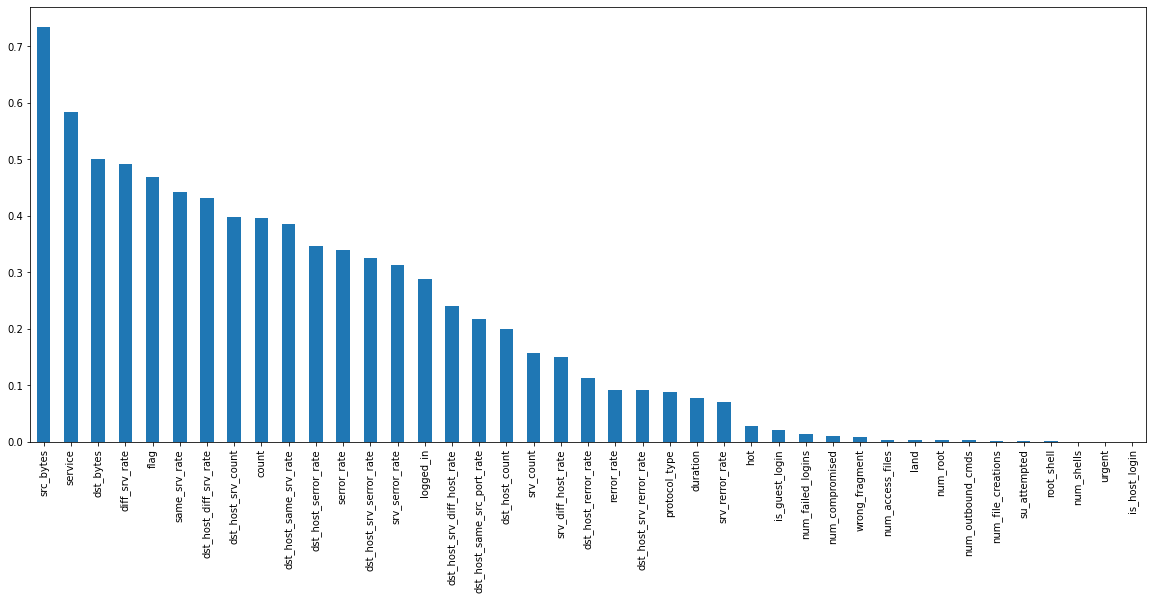

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
import seaborn as sns
def show_corr(dataset):
    plt.figure(figsize=(12,10))
    cor = dataset.corr()
    sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
    plt.show()

In [ ]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train,0.7)
print(corr_features)
len(set(corr_features))

{'is_guest_login', 'su_attempted', 'dst_host_srv_serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'num_root', 'dst_host_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_count'}


12

In [ ]:
from sklearn.feature_selection import SelectKBest
mutual_info_sel_cols = SelectKBest(mutual_info_classif, k=20)
mutual_info_sel_cols.fit(X_train, Y_train)
print(len(X_train.columns[mutual_info_sel_cols.get_support()]))
X_train.columns[mutual_info_sel_cols.get_support()]

20


Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import f_classif
f_classif_sel_cols = SelectKBest(f_classif, k=20)
f_classif_sel_cols.fit(X_train, Y_train)
print(len(X_train.columns[f_classif_sel_cols.get_support()]))
X_train.columns[f_classif_sel_cols.get_support()]

20


Index(['flag', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import chi2
chi2_sel_cols = SelectKBest(chi2, k=20)
chi2_sel_cols.fit(abs(X_train), Y_train)
print(len(X_train.columns[chi2_sel_cols.get_support()]))
X_train.columns[chi2_sel_cols.get_support()]

20


Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'hot',
       'logged_in', 'num_compromised', 'num_root', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object')

In [ ]:
X_t_1 = X_train.columns[mutual_info_sel_cols.get_support()]
X_t_2 = X_train.columns[f_classif_sel_cols.get_support()]
X_t_3 = X_train.columns[chi2_sel_cols.get_support()]

In [ ]:
sel_union_cols = set.union(set(X_t_1),set(X_t_2),set(X_t_3))
print(len(sel_union_cols))
sel_union_cols = np.array(list(sel_union_cols))
sel_union_cols

28


array(['srv_rerror_rate', 'logged_in', 'dst_host_same_srv_rate',
       'num_compromised', 'flag', 'num_root', 'duration',
       'dst_host_serror_rate', 'dst_host_srv_diff_host_rate',
       'srv_serror_rate', 'same_srv_rate', 'rerror_rate', 'src_bytes',
       'dst_host_count', 'srv_diff_host_rate', 'hot', 'count',
       'dst_bytes', 'dst_host_srv_serror_rate',
       'dst_host_same_src_port_rate', 'srv_count',
       'dst_host_diff_srv_rate', 'diff_srv_rate', 'service',
       'serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_count'], dtype='<U27')

In [ ]:
sel_intersection_cols = set.intersection(set(X_t_1),set(X_t_2),set(X_t_3))
print(len(sel_intersection_cols))
sel_intersection_cols = np.array(list(sel_intersection_cols))
sel_intersection_cols

12


array(['dst_host_srv_serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_count', 'flag', 'logged_in', 'serror_rate', 'count',
       'dst_host_serror_rate', 'dst_host_srv_count'], dtype='<U27')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_union = X_train[sel_union_cols]
X_test_union = X_test[sel_union_cols]
X_train_union

,srv_rerror_rate,logged_in,dst_host_same_srv_rate,num_compromised,flag,num_root,duration,dst_host_serror_rate,dst_host_srv_diff_host_rate,srv_serror_rate,...,dst_host_srv_serror_rate,dst_host_same_src_port_rate,srv_count,dst_host_diff_srv_rate,diff_srv_rate,service,serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,dst_host_srv_count
0,1.0,0,0.00,0,1,0,0,0.00,0.00,0.0,...,0.0,0.02,1,0.05,1.00,49,0.0,0.03,1.0,1
1,0.0,0,0.33,0,9,0,0,0.01,0.00,0.0,...,0.0,0.33,511,0.05,0.00,15,0.0,0.45,0.0,47
2,0.0,1,1.00,0,9,0,0,0.00,0.02,0.0,...,0.0,0.01,9,0.00,0.00,24,0.0,0.00,0.0,255
3,0.0,0,0.73,0,9,0,0,0.00,0.00,0.0,...,0.0,0.01,1,0.02,0.00,49,0.0,0.00,0.0,119
4,1.0,0,0.07,0,1,0,0,0.00,0.00,0.0,...,0.0,0.00,20,0.08,0.06,49,0.0,1.00,1.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25179,0.0,0,0.05,0,5,0,0,1.00,0.00,1.0,...,1.0,0.00,13,0.09,0.08,49,1.0,0.00,0.0,13
25184,0.0,1,0.24,0,9,0,29,0.00,0.00,0.0,...,0.0,0.00,1,0.02,0.00,19,0.0,0.03,0.1,60
25188,0.0,1,1.00,0,9,0,0,0.00,0.18,0.0,...,0.0,1.00,1,0.00,0.00,20,0.0,0.00,0.0,39
25189,1.0,0,0.05,0,1,0,0,0.00,0.00,0.0,...,0.0,0.00,7,0.07,0.07,49,0.0,1.00,1.0,13


In [ ]:
X_train_intersection = X_train[sel_intersection_cols]
X_test_intersection = X_test[sel_intersection_cols]
X_train_intersection

,dst_host_srv_serror_rate,srv_serror_rate,same_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_count,flag,logged_in,serror_rate,count,dst_host_serror_rate,dst_host_srv_count
0,0.0,0.0,0.50,0.02,0.00,232,1,0,0.0,2,0.00,1
1,0.0,0.0,1.00,0.33,0.33,141,9,0,0.0,511,0.01,47
2,0.0,0.0,1.00,0.01,1.00,157,9,1,0.0,9,0.00,255
3,0.0,0.0,1.00,0.01,0.73,163,9,0,0.0,1,0.00,119
4,0.0,0.0,0.14,0.00,0.07,255,1,0,0.0,143,0.00,17
...,...,...,...,...,...,...,...,...,...,...,...,...
25179,1.0,1.0,0.06,0.00,0.05,255,5,0,1.0,209,1.00,13
25184,0.0,0.0,1.00,0.00,0.24,255,9,1,0.0,1,0.00,60
25188,0.0,0.0,1.00,1.00,1.00,1,9,1,0.0,1,0.00,39
25189,0.0,0.0,0.07,0.00,0.05,255,1,0,0.0,105,0.00,13


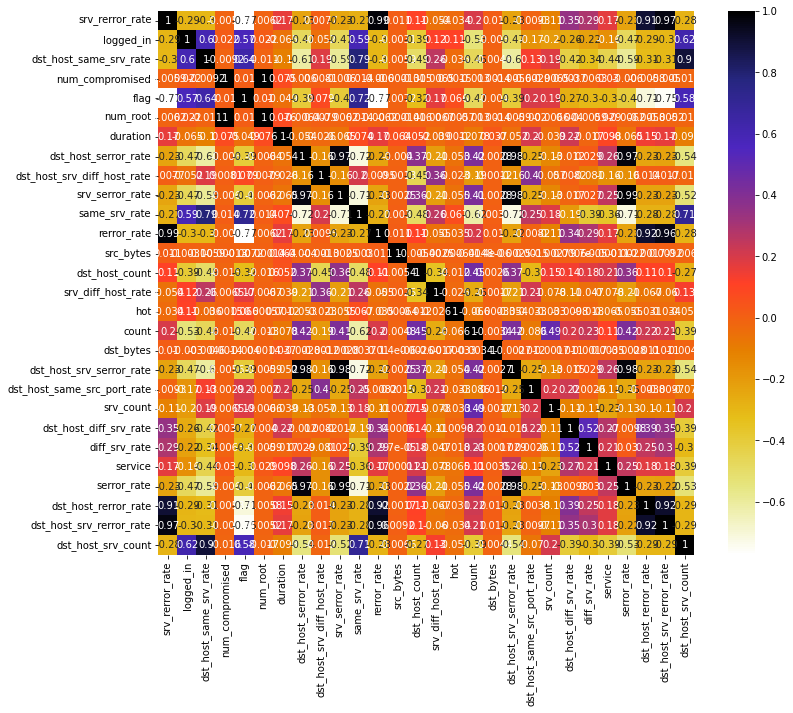

In [ ]:
show_corr(X_train_union)

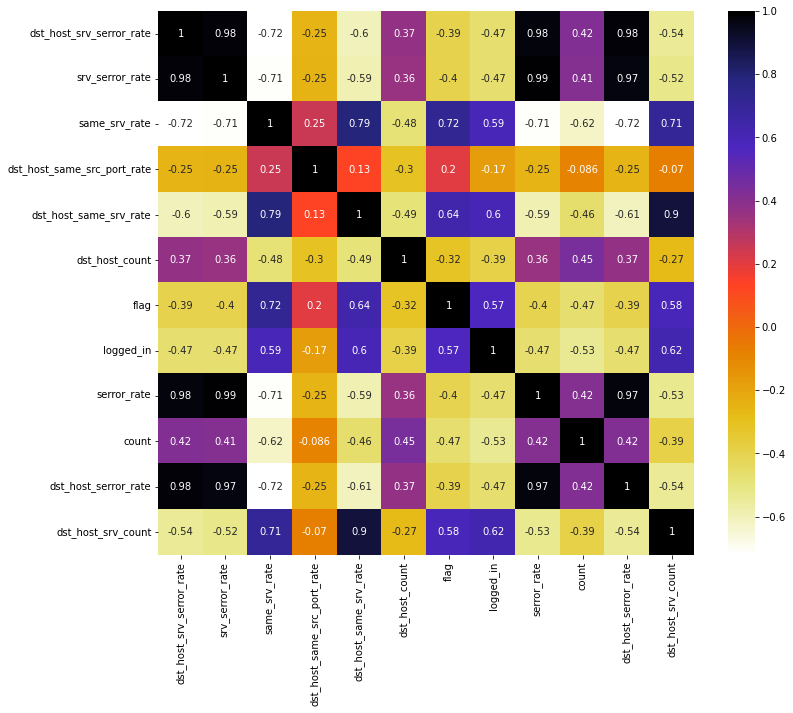

In [ ]:
show_corr(X_train_intersection)

In [ ]:
def scaleMinMax(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

In [ ]:
X_train_union = scaleMinMax(X_train_union)
X_test_union = scaleMinMax(X_test_union)
X_train_intersection = scaleMinMax(X_train_intersection)
X_test_intersection = scaleMinMax(X_test_intersection)

# Experimental Functions

Performance metrices

In [ ]:
def score_in_details(y_pred,y_real):
  accuracy = recall_score(y_real, y_pred, average='weighted')
  precision = precision_score(y_real, y_pred, average='weighted')
  recall = recall_score(y_real, y_pred, average='weighted')
  f1 = f1_score(y_real, y_pred, average='weighted')

  accuracy = round(accuracy * 100,4)
  precision = round(precision * 100,4)
  recall = round(recall * 100,4)
  f1 = round(f1 * 100,4)
  print(f"Accuracy: {accuracy} %")
  print(f"Precision: {precision} %")
  print(f"Recall: {recall} %")
  print(f"F1-score: {f1} %")
  
  print()

  conf_matrix = confusion_matrix(y_real, y_pred)
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g', xticklabels=['Dos', 'Probe','R2L','U2R','normal'], yticklabels=['Dos', 'Probe','R2L','U2R','normal'])
  plt.title('Confusion matrix', fontsize=20)
  plt.ylabel('Actual label', fontsize=20)
  plt.xlabel('Predicted label', fontsize=20)
  plt.show()
  return accuracy, precision, recall, f1;

ROC for individual class

In [ ]:
def generateROC(key,x_train,x_test):
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = ["tomato", "aqua","crimson","darkorange", "cornflowerblue"]
    label_binarizer = LabelBinarizer().fit(Y_train)
    y_onehot_test = label_binarizer.transform(Y_test)
    y_score = models[key].fit(x_train, Y_train).predict_proba(x_test)
    for label in Y_train.unique():
        label_binarizer.transform([label])
        class_of_interest = label
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{class_of_interest} vs the rest",
            color=colors[class_id],
            ax=ax
        )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"One-vs-Rest ROC curves({key}):")
    plt.legend()
    plt.show()

Prediction

In [ ]:
def predictScores(x_train,x_test):
    accuracy, precision, recall, f1 = {}, {}, {}, {}
     
    for key in models.keys():
        
        # Fit the classifier
        models[key].fit(x_train, Y_train)
        
        # Make predictions
        predictions = models[key].predict(x_test)       
        print(f'{key} :')
        print()
        ###
        acc, pre, rec, f = score_in_details(Y_test, predictions)
        # Calculate metrics
        accuracy[key] = acc
        precision[key] = pre
        recall[key] = rec
        f1[key] = f
        ###
        print(classification_report(Y_test, predictions,digits=4))
        generateROC(key,x_train,x_test)
        

    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','F1 Score'])
    df_model['Accuracy'] = accuracy.values()
    df_model['Precision'] = precision.values()
    df_model['Recall'] = recall.values()
    df_model['F1 Score'] = f1.values()
    
    return df_model;

Macro Avg ROC

In [ ]:
def generateMacroROC(x_train,x_test):
    fpr, tpr, roc_auc = dict(), dict(), dict()
    fig, ax = plt.subplots(figsize=(6, 6))
    label_binarizer = LabelBinarizer().fit(Y_train)
    y_onehot_test = label_binarizer.transform(Y_test)

    for i, key in enumerate(models.keys()):
        y_score = models[key].fit(x_train, Y_train).predict_proba(x_test)

        for i in range(len(Y_train.unique())):
            fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        fpr_grid = np.linspace(0.0, 1.0, 1000)

        # Interpolate all ROC curves at these points
        mean_tpr = np.zeros_like(fpr_grid)

        for i in range(len(Y_train.unique())):
            mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

        # Average it and compute AUC
        mean_tpr /= len(Y_train.unique())

        fpr["macro"] = fpr_grid
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        #print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")


        plt.plot(
            fpr["macro"],
            tpr["macro"],
            label=f"{key}: (AUC = {roc_auc['macro']:.3f})"
        )
    

    plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Macro-Average Receiver Operating Characteristic(ROC)")
    plt.legend()
    plt.show()

In [ ]:
def plotChart(predicts):
    fig, ax = plt.subplots(figsize=(20, 6))

    label = []
    for keys in models.keys():
        label.append(keys)
    X_axis = np.arange(len(label))

    plt.bar(X_axis, predicts['Accuracy'],0.2,label='Accuracy')
    plt.bar(X_axis+.2, predicts['Precision'],0.2,label='Precision')
    plt.bar(X_axis+.4, predicts['Recall'],0.2,label='Recall')
    plt.bar(X_axis+.6, predicts['F1 Score'],0.2,label='F1 score')


    plt.xticks(X_axis+.3, label)
    plt.xlabel('Models')
    plt.title("Performance metrics according to different Models")
    plt.legend()
    plt.show()

# New code segment

In [ ]:
models = {}
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees 5'] = DecisionTreeClassifier(max_depth=5,random_state=5)
#models['Decision Trees 20'] = DecisionTreeClassifier(max_depth=20,random_state=20)
#models['Decision Trees 40'] = DecisionTreeClassifier(max_depth=40,random_state=40)
models['Decision Trees 41'] = DecisionTreeClassifier(max_depth=41,random_state=40)
#models['Decision Trees 42'] = DecisionTreeClassifier(max_depth=42,random_state=40)
#models['Decision Trees 43'] = DecisionTreeClassifier(max_depth=43,random_state=40)
#models['Decision Trees 44'] = DecisionTreeClassifier(max_depth=44,random_state=40)
#models['Decision Trees 45'] = DecisionTreeClassifier(max_depth=45,random_state=40)
#models['Decision Trees 68'] = DecisionTreeClassifier(max_depth=68,random_state=40)

In [ ]:
models = {}
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor 11'] = KNeighborsClassifier(n_neighbors=11)
models['K-Nearest Neighbor 20'] = KNeighborsClassifier(n_neighbors=20)

In [ ]:
models = {}
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

In [ ]:
models = {}
models['Naive Bayes'] = GaussianNB()

In [ ]:
models = {}
models['Logistic Regression'] = LogisticRegression()

In [ ]:
models = {}
models['Ada Boost'] = AdaBoostClassifier(n_estimators=100, random_state=40)

In [ ]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(max_depth=41,random_state=40)
###
# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

models['Ada Boost'] = AdaBoostClassifier(n_estimators=100, random_state=40)

Logistic Regression :

Accuracy: 42.4751 %
Precision: 95.8147 %
Recall: 42.4751 %
F1-score: 58.8505 %



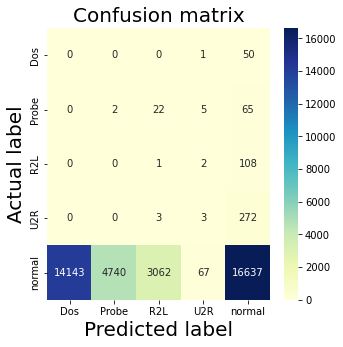

              precision    recall  f1-score   support

         Dos     0.0000    0.0000    0.0000     14143
       Probe     0.0213    0.0004    0.0008      4742
         R2L     0.0090    0.0003    0.0006      3088
         U2R     0.0108    0.0385    0.0169        78
      normal     0.4305    0.9711    0.5965     17132

    accuracy                         0.4248     39183
   macro avg     0.0943    0.2021    0.1230     39183
weighted avg     0.1915    0.4248    0.2610     39183



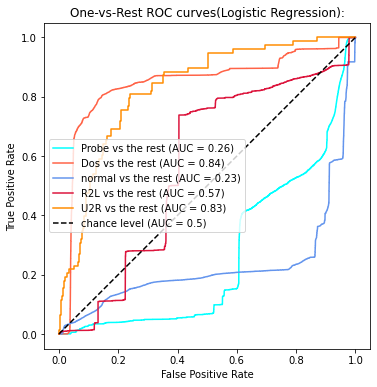

Decision Trees :

Accuracy: 97.1952 %
Precision: 97.2065 %
Recall: 97.1952 %
F1-score: 97.1958 %



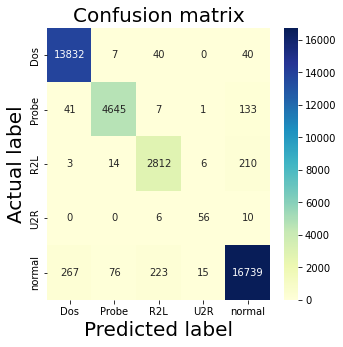

              precision    recall  f1-score   support

         Dos     0.9937    0.9780    0.9858     14143
       Probe     0.9623    0.9795    0.9708      4742
         R2L     0.9235    0.9106    0.9170      3088
         U2R     0.7778    0.7179    0.7467        78
      normal     0.9665    0.9771    0.9717     17132

    accuracy                         0.9720     39183
   macro avg     0.9248    0.9126    0.9184     39183
weighted avg     0.9720    0.9720    0.9719     39183



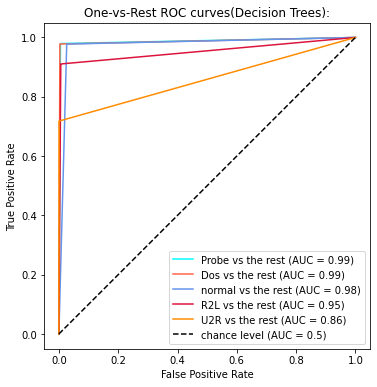

Random Forest :

Accuracy: 98.6219 %
Precision: 98.7142 %
Recall: 98.6219 %
F1-score: 98.6428 %



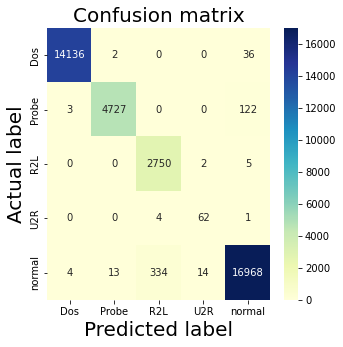

              precision    recall  f1-score   support

         Dos     0.9973    0.9995    0.9984     14143
       Probe     0.9742    0.9968    0.9854      4742
         R2L     0.9975    0.8905    0.9410      3088
         U2R     0.9254    0.7949    0.8552        78
      normal     0.9789    0.9904    0.9847     17132

    accuracy                         0.9862     39183
   macro avg     0.9747    0.9344    0.9529     39183
weighted avg     0.9864    0.9862    0.9860     39183



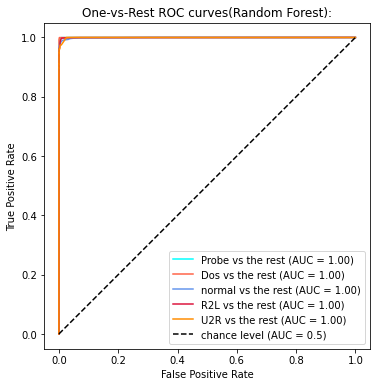

Naive Bayes :

Accuracy: 39.1854 %
Precision: 80.4338 %
Recall: 39.1854 %
F1-score: 48.341 %



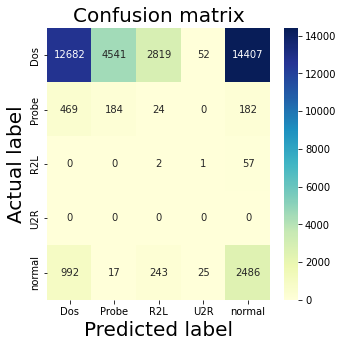

              precision    recall  f1-score   support

         Dos     0.3676    0.8967    0.5214     14143
       Probe     0.2142    0.0388    0.0657      4742
         R2L     0.0333    0.0006    0.0013      3088
         U2R     0.0000    0.0000    0.0000        78
      normal     0.6606    0.1451    0.2380     17132

    accuracy                         0.3919     39183
   macro avg     0.2552    0.2163    0.1653     39183
weighted avg     0.4501    0.3919    0.3003     39183



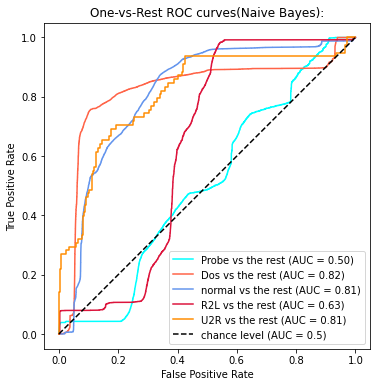

K-Nearest Neighbor :

Accuracy: 96.1846 %
Precision: 96.4246 %
Recall: 96.1846 %
F1-score: 96.2816 %



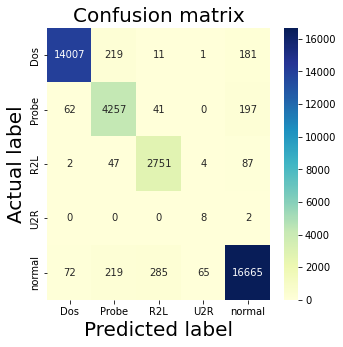

              precision    recall  f1-score   support

         Dos     0.9714    0.9904    0.9808     14143
       Probe     0.9342    0.8977    0.9156      4742
         R2L     0.9516    0.8909    0.9202      3088
         U2R     0.8000    0.1026    0.1818        78
      normal     0.9630    0.9727    0.9678     17132

    accuracy                         0.9618     39183
   macro avg     0.9240    0.7709    0.7933     39183
weighted avg     0.9613    0.9618    0.9609     39183



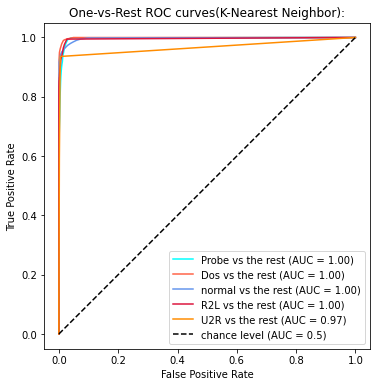

Ada Boost :

Accuracy: 62.1673 %
Precision: 74.1156 %
Recall: 62.1673 %
F1-score: 61.7189 %



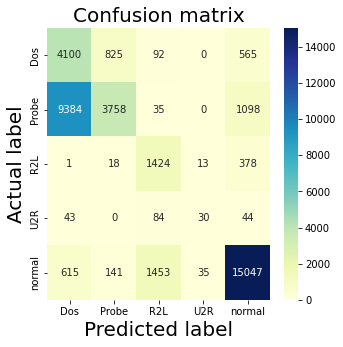

              precision    recall  f1-score   support

         Dos     0.7345    0.2899    0.4157     14143
       Probe     0.2633    0.7925    0.3952      4742
         R2L     0.7764    0.4611    0.5786      3088
         U2R     0.1493    0.3846    0.2151        78
      normal     0.8702    0.8783    0.8742     17132

    accuracy                         0.6217     39183
   macro avg     0.5587    0.5613    0.4958     39183
weighted avg     0.7390    0.6217    0.6262     39183



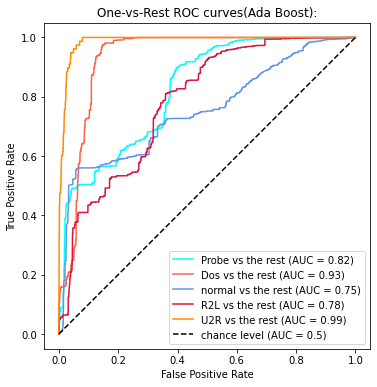

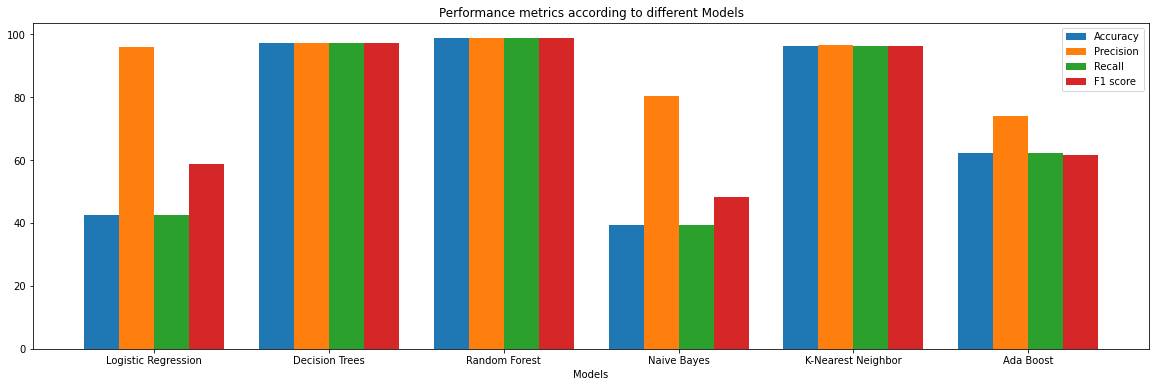

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,42.4751,95.8147,42.4751,58.8505
Decision Trees,97.1952,97.2065,97.1952,97.1958
Random Forest,98.6219,98.7142,98.6219,98.6428
Naive Bayes,39.1854,80.4338,39.1854,48.3410
K-Nearest Neighbor,96.1846,96.4246,96.1846,96.2816
Ada Boost,62.1673,74.1156,62.1673,61.7189


In [ ]:
predictspca = predictScores(X_train_pca,X_test_pca)
plotChart(predictspca)
predictspca

Logistic Regression :

Accuracy: 82.9186 %
Precision: 89.3291 %
Recall: 82.9186 %
F1-score: 85.3976 %



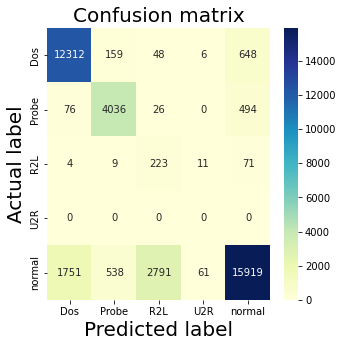

              precision    recall  f1-score   support

         Dos     0.9346    0.8705    0.9014     14143
       Probe     0.8713    0.8511    0.8611      4742
         R2L     0.7013    0.0722    0.1309      3088
         U2R     0.0000    0.0000    0.0000        78
      normal     0.7559    0.9292    0.8336     17132

    accuracy                         0.8292     39183
   macro avg     0.6526    0.5446    0.5454     39183
weighted avg     0.8286    0.8292    0.8044     39183



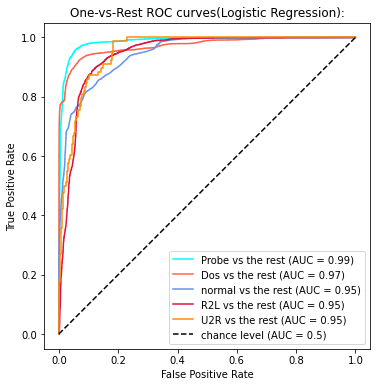

Decision Trees :

Accuracy: 94.615 %
Precision: 95.3421 %
Recall: 94.615 %
F1-score: 94.7504 %



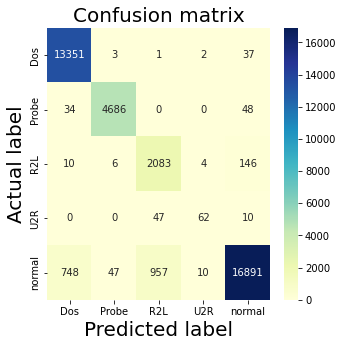

              precision    recall  f1-score   support

         Dos     0.9968    0.9440    0.9697     14143
       Probe     0.9828    0.9882    0.9855      4742
         R2L     0.9262    0.6745    0.7806      3088
         U2R     0.5210    0.7949    0.6294        78
      normal     0.9055    0.9859    0.9440     17132

    accuracy                         0.9462     39183
   macro avg     0.8665    0.8775    0.8618     39183
weighted avg     0.9487    0.9462    0.9448     39183



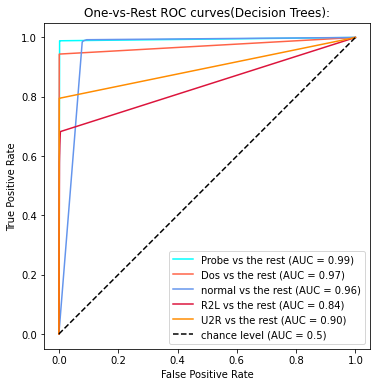

Random Forest :

Accuracy: 98.1574 %
Precision: 98.3114 %
Recall: 98.1574 %
F1-score: 98.2005 %



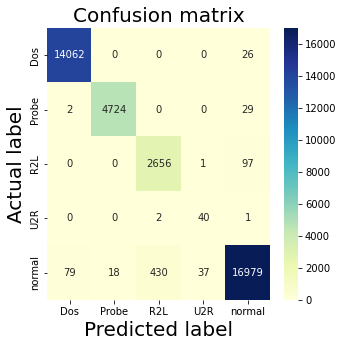

              precision    recall  f1-score   support

         Dos     0.9982    0.9943    0.9962     14143
       Probe     0.9935    0.9962    0.9948      4742
         R2L     0.9644    0.8601    0.9093      3088
         U2R     0.9302    0.5128    0.6612        78
      normal     0.9679    0.9911    0.9793     17132

    accuracy                         0.9816     39183
   macro avg     0.9708    0.8709    0.9082     39183
weighted avg     0.9815    0.9816    0.9811     39183



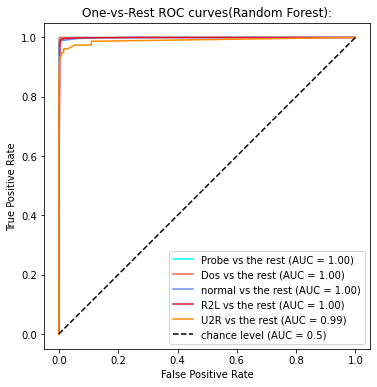

Naive Bayes :

Accuracy: 56.8639 %
Precision: 62.6411 %
Recall: 56.8639 %
F1-score: 53.4127 %



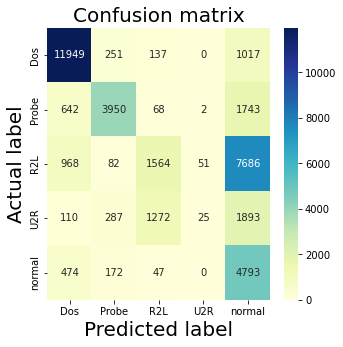

              precision    recall  f1-score   support

         Dos     0.8948    0.8449    0.8691     14143
       Probe     0.6167    0.8330    0.7087      4742
         R2L     0.1511    0.5065    0.2328      3088
         U2R     0.0070    0.3205    0.0136        78
      normal     0.8737    0.2798    0.4238     17132

    accuracy                         0.5686     39183
   macro avg     0.5086    0.5569    0.4496     39183
weighted avg     0.7915    0.5686    0.6032     39183



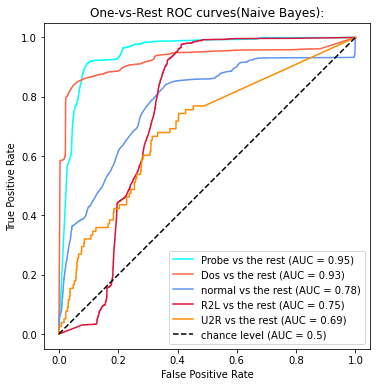

K-Nearest Neighbor :

Accuracy: 96.501 %
Precision: 96.7928 %
Recall: 96.501 %
F1-score: 96.6288 %



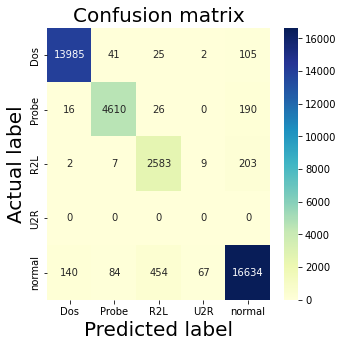

              precision    recall  f1-score   support

         Dos     0.9878    0.9888    0.9883     14143
       Probe     0.9521    0.9722    0.9620      4742
         R2L     0.9212    0.8365    0.8768      3088
         U2R     0.0000    0.0000    0.0000        78
      normal     0.9571    0.9709    0.9640     17132

    accuracy                         0.9650     39183
   macro avg     0.7636    0.7537    0.7582     39183
weighted avg     0.9628    0.9650    0.9637     39183



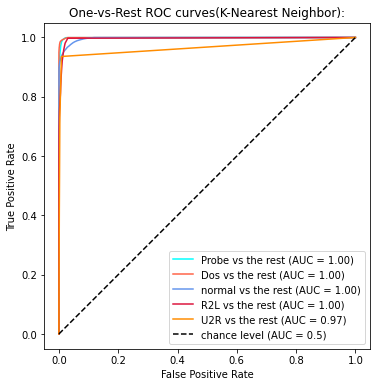

Ada Boost :

Accuracy: 79.0802 %
Precision: 80.3575 %
Recall: 79.0802 %
F1-score: 78.5824 %



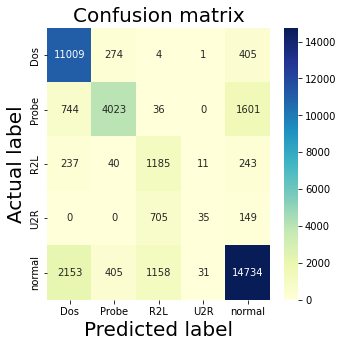

              precision    recall  f1-score   support

         Dos     0.9415    0.7784    0.8522     14143
       Probe     0.6282    0.8484    0.7219      4742
         R2L     0.6906    0.3837    0.4933      3088
         U2R     0.0394    0.4487    0.0724        78
      normal     0.7973    0.8600    0.8275     17132

    accuracy                         0.7908     39183
   macro avg     0.6194    0.6639    0.5935     39183
weighted avg     0.8189    0.7908    0.7958     39183



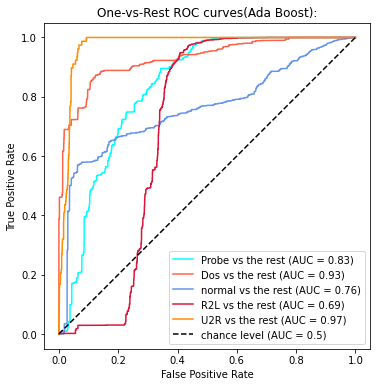

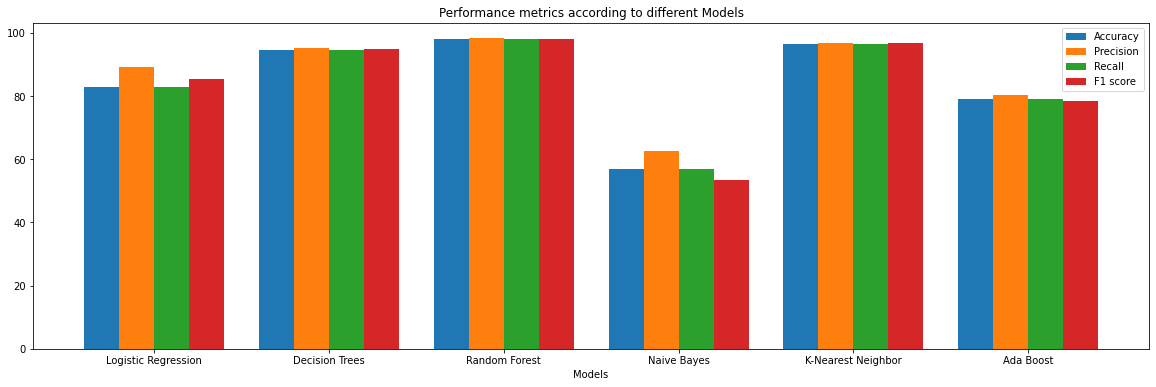

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,82.9186,89.3291,82.9186,85.3976
Decision Trees,94.6150,95.3421,94.6150,94.7504
Random Forest,98.1574,98.3114,98.1574,98.2005
Naive Bayes,56.8639,62.6411,56.8639,53.4127
K-Nearest Neighbor,96.5010,96.7928,96.5010,96.6288
Ada Boost,79.0802,80.3575,79.0802,78.5824


In [ ]:
predictsunion = predictScores(X_train_union,X_test_union)
plotChart(predictsunion)
predictsunion

Logistic Regression :

Accuracy: 75.571 %
Precision: 84.0964 %
Recall: 75.571 %
F1-score: 79.1565 %



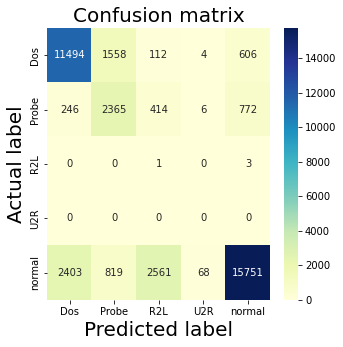

              precision    recall  f1-score   support

         Dos     0.8345    0.8127    0.8234     14143
       Probe     0.6219    0.4987    0.5535      4742
         R2L     0.2500    0.0003    0.0006      3088
         U2R     0.0000    0.0000    0.0000        78
      normal     0.7291    0.9194    0.8133     17132

    accuracy                         0.7557     39183
   macro avg     0.4871    0.4462    0.4382     39183
weighted avg     0.7150    0.7557    0.7199     39183



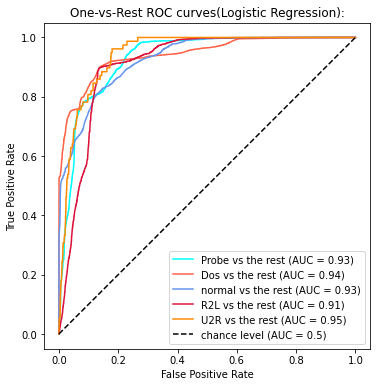

Decision Trees :

Accuracy: 95.3322 %
Precision: 95.5268 %
Recall: 95.3322 %
F1-score: 95.3965 %



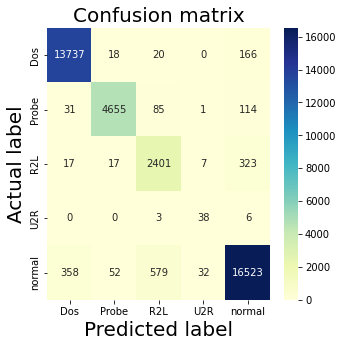

              precision    recall  f1-score   support

         Dos     0.9854    0.9713    0.9783     14143
       Probe     0.9527    0.9817    0.9670      4742
         R2L     0.8684    0.7775    0.8204      3088
         U2R     0.8085    0.4872    0.6080        78
      normal     0.9418    0.9645    0.9530     17132

    accuracy                         0.9533     39183
   macro avg     0.9114    0.8364    0.8653     39183
weighted avg     0.9528    0.9533    0.9527     39183



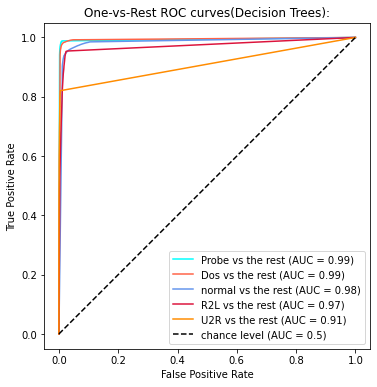

Random Forest :

Accuracy: 95.4419 %
Precision: 95.7371 %
Recall: 95.4419 %
F1-score: 95.5293 %



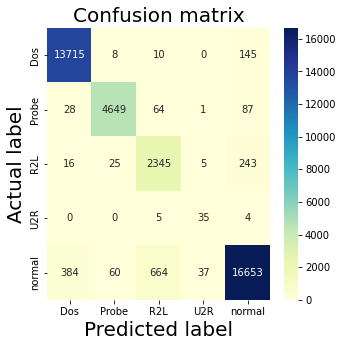

              precision    recall  f1-score   support

         Dos     0.9883    0.9697    0.9789     14143
       Probe     0.9627    0.9804    0.9715      4742
         R2L     0.8903    0.7594    0.8196      3088
         U2R     0.7955    0.4487    0.5738        78
      normal     0.9357    0.9720    0.9535     17132

    accuracy                         0.9544     39183
   macro avg     0.9145    0.8261    0.8595     39183
weighted avg     0.9541    0.9544    0.9535     39183



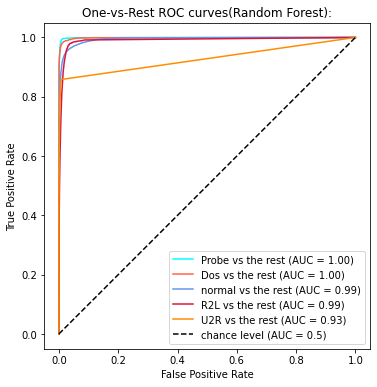

Naive Bayes :

Accuracy: 58.3059 %
Precision: 64.11 %
Recall: 58.3059 %
F1-score: 52.841 %



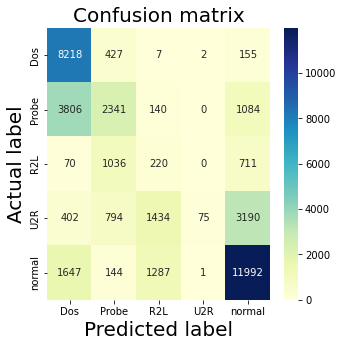

              precision    recall  f1-score   support

         Dos     0.9329    0.5811    0.7161     14143
       Probe     0.3176    0.4937    0.3865      4742
         R2L     0.1080    0.0712    0.0859      3088
         U2R     0.0127    0.9615    0.0251        78
      normal     0.7957    0.7000    0.7448     17132

    accuracy                         0.5831     39183
   macro avg     0.4334    0.5615    0.3917     39183
weighted avg     0.7316    0.5831    0.6377     39183



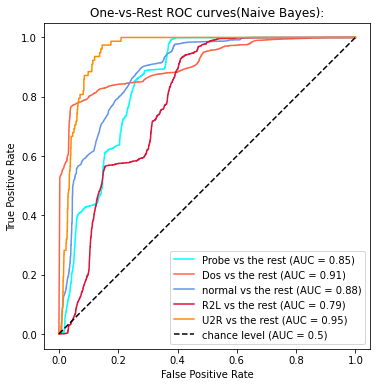

K-Nearest Neighbor :

Accuracy: 91.7439 %
Precision: 92.7362 %
Recall: 91.7439 %
F1-score: 92.0985 %



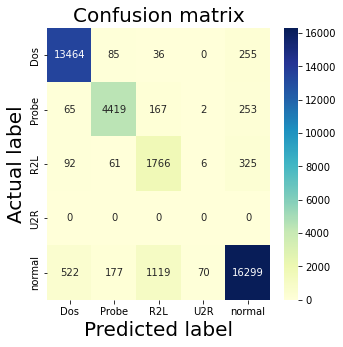

              precision    recall  f1-score   support

         Dos     0.9728    0.9520    0.9623     14143
       Probe     0.9007    0.9319    0.9160      4742
         R2L     0.7849    0.5719    0.6617      3088
         U2R     0.0000    0.0000    0.0000        78
      normal     0.8962    0.9514    0.9230     17132

    accuracy                         0.9174     39183
   macro avg     0.7109    0.6814    0.6926     39183
weighted avg     0.9138    0.9174    0.9139     39183



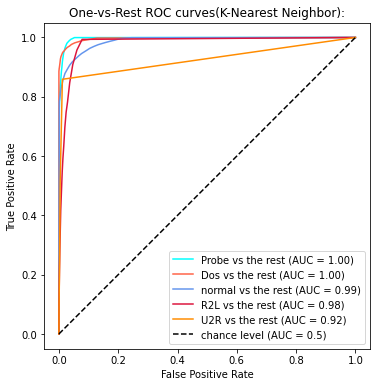

Ada Boost :

Accuracy: 45.0068 %
Precision: 61.1897 %
Recall: 45.0068 %
F1-score: 50.4278 %



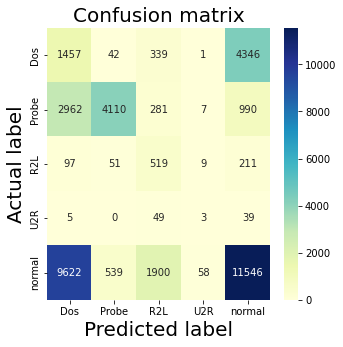

              precision    recall  f1-score   support

         Dos     0.2356    0.1030    0.1433     14143
       Probe     0.4922    0.8667    0.6279      4742
         R2L     0.5851    0.1681    0.2611      3088
         U2R     0.0312    0.0385    0.0345        78
      normal     0.4879    0.6739    0.5660     17132

    accuracy                         0.4501     39183
   macro avg     0.3664    0.3700    0.3266     39183
weighted avg     0.4041    0.4501    0.3959     39183



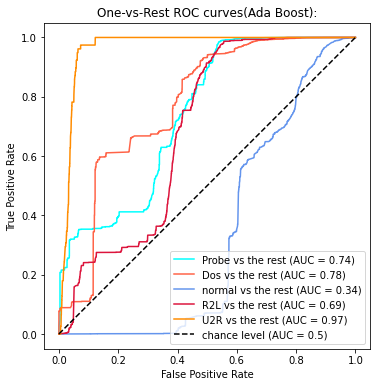

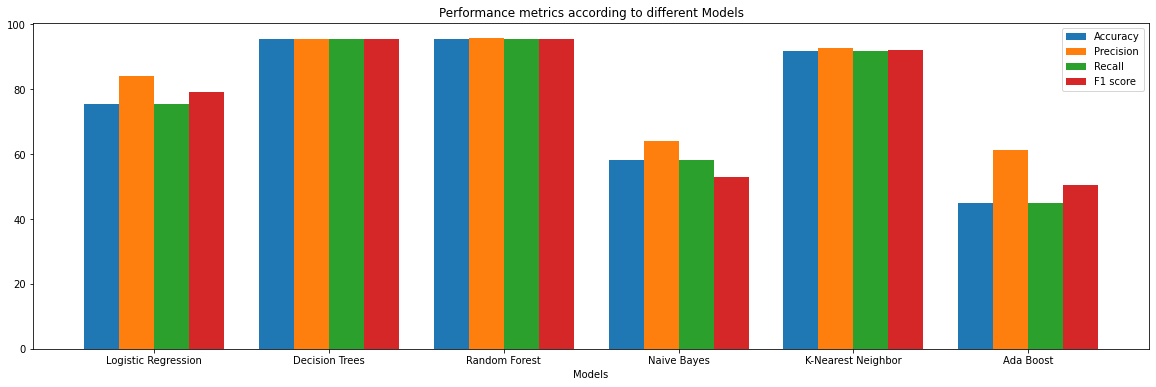

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,75.5710,84.0964,75.5710,79.1565
Decision Trees,95.3322,95.5268,95.3322,95.3965
Random Forest,95.4419,95.7371,95.4419,95.5293
Naive Bayes,58.3059,64.1100,58.3059,52.8410
K-Nearest Neighbor,91.7439,92.7362,91.7439,92.0985
Ada Boost,45.0068,61.1897,45.0068,50.4278


In [ ]:
predictsintersec = predictScores(X_train_intersection,X_test_intersection)
plotChart(predictsintersec)
predictsintersec

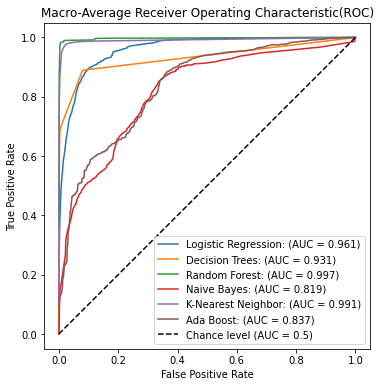

In [ ]:
generateMacroROC(X_train_union,X_test_union)

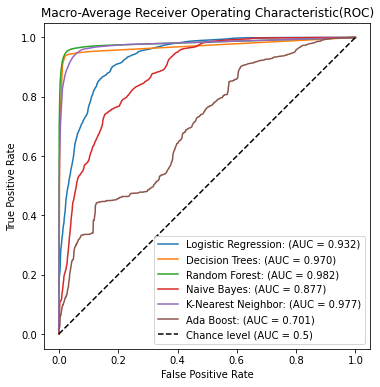

In [ ]:
generateMacroROC(X_train_intersection,X_test_intersection)

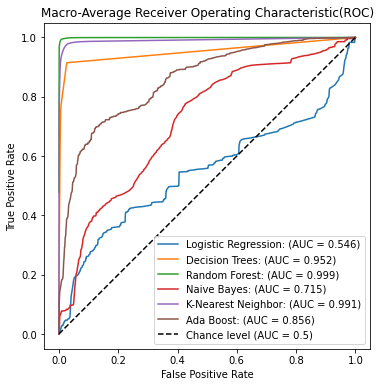

In [ ]:
generateMacroROC(X_train_pca,X_test_pca)